## Uji Hipotesis - Model Prediksi BTC-USD 

In [1]:
# lib statistic 
import scipy.stats as sc

# lib manipulation dataset
import pandas as pd
import numpy as np

# lib data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# lib min-max scaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
# load dataset
dataset = pd.read_excel("dataset/hasil_penelitian.xlsx", sheet_name="hasil evaluasi windows")
np.round(dataset[:5],3)

,LSTM-R,LSTM-MAE,LSTM-RMSE,LSTM-MAPE,LSTM-TIME,GRU-R,GRU-MAE,GRU-RMSE,GRU-MAPE,GRU-TIME
0,0.996,1082.83,1535.47,0.035,221.26,0.997,1314.78,2031.56,0.035,187.99
1,0.996,1091.48,1491.92,0.036,210.97,0.998,776.01,1171.66,0.023,190.84
2,0.996,1306.03,1594.93,0.047,215.56,0.998,1055.42,1534.85,0.030,186.80
3,0.996,1253.72,1644.21,0.043,207.76,0.997,683.48,1053.63,0.022,183.21
4,0.997,909.17,1456.14,0.026,217.82,0.998,729.81,1151.63,0.021,189.79


### Hypothesis Test of Non-parametric

In [3]:
def boxplot(dataset, title):

  # create boxplot
  fig, ax = plt.subplots(figsize=(8,4))
  sns.boxplot(data=dataset)

  # set labels
  ax.set_title(title)
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.grid(True)

  # show boxplot
  plt.show()

In [4]:
# Hipotesa Awal
# H0 = Nilai R dan MAPE terdistribusi normal
# H2 = Nilai R dan MAPE TIDAK terdistribusi normal

# Interpretasi hasil:
# - p-value > 0.05: Data berdistribusi normal
# - p-value <= 0.05: Data tidak berdistribusi normal

# func normality test
def normality(lstm, gru):

  print("Hasil Uji-Normalitas")
  print("p-value shapiro wilk:",np.round(sc.shapiro(lstm).pvalue,2),"(untuk LSTM)")
  print("p-value shapiro wilk:",np.round(sc.shapiro(gru).pvalue,2),"(untuk GRU)")

In [5]:
# Hipotesa Awal
# H0 = Maetode GRU lebih baik dari Metode LSTM
# H1 = Maetode GRU TIDAK lebih baik dari Metode LSTM

# Interpretasi hasil:
# p-value < 0.05 = Terima H0
# p-value > 0.05 = Terima H1

# func hypothesis test
def hypothesis(lstm, gru):
  
  # Mann-Whitney Test
  Mann_Whitney = np.round(sc.mannwhitneyu(lstm, gru).pvalue,4)

  # Intrepetasi hasil
  print("Mann_Whitney")
  if Mann_Whitney < 0.05:
    print("Karena p-value:",Mann_Whitney,"maka Terima H0")
  else :
    print("Karena p-value:",Mann_Whitney,"maka Terima H1")
  print("")
  # --------------------------------------------------------------
  
  # Wilcoxon Rank Test
  Wilcoxon = np.round(sc.wilcoxon(lstm, gru).pvalue,4)

  # Intrepetasi hasil
  print("Wilcoxon Rank Test")
  if Wilcoxon < 0.05:
    print("Karena p-value:",Wilcoxon,"maka Terima H0")
  else :
    print("Karena p-value:",Wilcoxon,"maka Terima H1")
  print("")
  # --------------------------------------------------------------

  # Kruskal-Wallis Test
  Kruskal_Wallis = np.round(sc.kruskal(lstm, gru).pvalue,4)

  # Intrepetasi hasil
  print("Kruskal-Wallis Test")
  if Kruskal_Wallis < 0.05:
    print("Karena p-value:",Kruskal_Wallis,"maka Terima H0")
  else :
    print("Karena p-value:",Kruskal_Wallis,"maka Terima H1")
  print("")
  # --------------------------------------------------------------

### Hypothesis Test for R Values

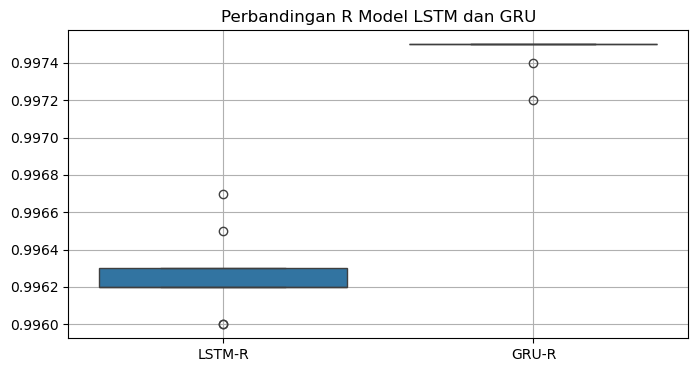

In [6]:
boxplot(dataset[["LSTM-R", "GRU-R"]], "Perbandingan R Model LSTM dan GRU")

In [7]:
normality(dataset["LSTM-R"], dataset["GRU-R"])

Hasil Uji-Normalitas
p-value shapiro wilk: 0.17 (untuk LSTM)
p-value shapiro wilk: 0.0 (untuk GRU)


In [8]:
hypothesis(dataset["LSTM-R"], dataset["GRU-R"])

Mann_Whitney
Karena p-value: 0.0001 maka Terima H0

Wilcoxon Rank Test
Karena p-value: 0.002 maka Terima H0

Kruskal-Wallis Test
Karena p-value: 0.0001 maka Terima H0



### Hypothesis Test for MAE Values

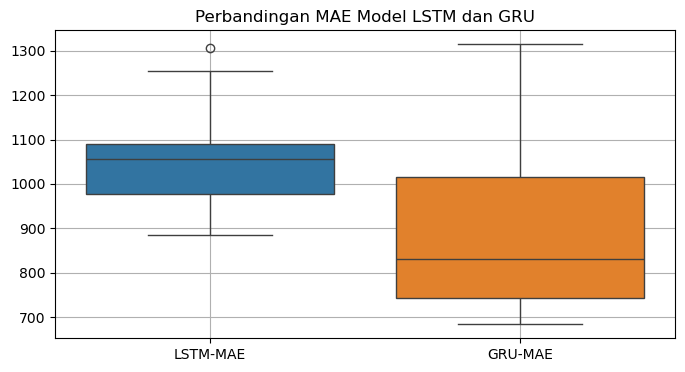

In [9]:
boxplot(dataset[["LSTM-MAE", "GRU-MAE"]], "Perbandingan MAE Model LSTM dan GRU")

In [10]:
normality(dataset["LSTM-MAE"], dataset["GRU-MAE"])

Hasil Uji-Normalitas
p-value shapiro wilk: 0.47 (untuk LSTM)
p-value shapiro wilk: 0.12 (untuk GRU)


In [11]:
hypothesis(dataset["LSTM-MAE"], dataset["GRU-MAE"])

Mann_Whitney
Karena p-value: 0.0376 maka Terima H0

Wilcoxon Rank Test
Karena p-value: 0.0488 maka Terima H0

Kruskal-Wallis Test
Karena p-value: 0.0343 maka Terima H0



### Hypothesis Test for RMSE Values

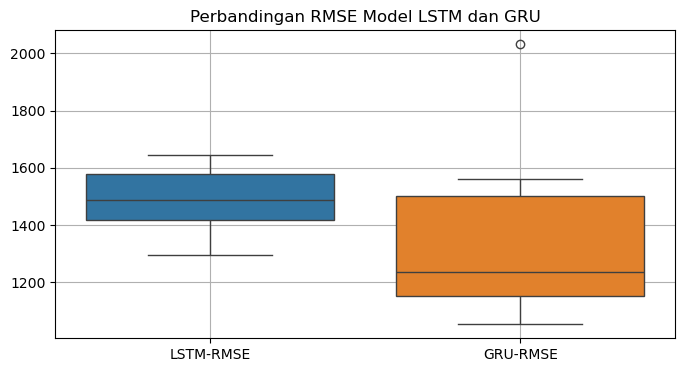

In [12]:
boxplot(dataset[["LSTM-RMSE", "GRU-RMSE"]], "Perbandingan RMSE Model LSTM dan GRU")

In [13]:
normality(dataset["LSTM-RMSE"], dataset["GRU-RMSE"])

Hasil Uji-Normalitas
p-value shapiro wilk: 0.84 (untuk LSTM)
p-value shapiro wilk: 0.06 (untuk GRU)


In [14]:
hypothesis(dataset["LSTM-RMSE"], dataset["GRU-RMSE"])

Mann_Whitney
Karena p-value: 0.089 maka Terima H1

Wilcoxon Rank Test
Karena p-value: 0.1055 maka Terima H1

Kruskal-Wallis Test
Karena p-value: 0.0821 maka Terima H1



### Hypothesis Test for MAPE Values

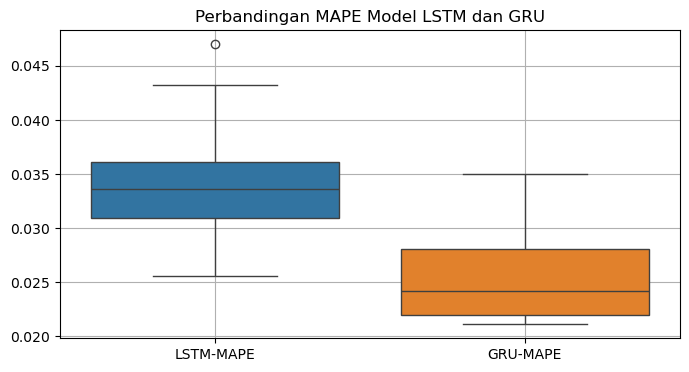

In [15]:
boxplot(dataset[["LSTM-MAPE", "GRU-MAPE"]], "Perbandingan MAPE Model LSTM dan GRU")

In [16]:
normality(dataset["LSTM-MAPE"], dataset["GRU-MAPE"])

Hasil Uji-Normalitas
p-value shapiro wilk: 0.53 (untuk LSTM)
p-value shapiro wilk: 0.11 (untuk GRU)


In [17]:
hypothesis(dataset["LSTM-MAPE"], dataset["GRU-MAPE"])

Mann_Whitney
Karena p-value: 0.0046 maka Terima H0

Wilcoxon Rank Test
Karena p-value: 0.0039 maka Terima H0

Kruskal-Wallis Test
Karena p-value: 0.0041 maka Terima H0



### Hypothesis Test for Time Values

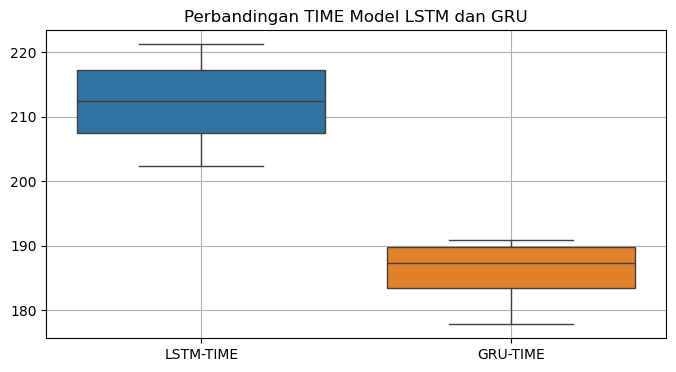

In [18]:
boxplot(dataset[["LSTM-TIME", "GRU-TIME"]], "Perbandingan TIME Model LSTM dan GRU")

In [19]:
normality(dataset["LSTM-TIME"], dataset["GRU-TIME"])

Hasil Uji-Normalitas
p-value shapiro wilk: 0.71 (untuk LSTM)
p-value shapiro wilk: 0.24 (untuk GRU)


In [20]:
hypothesis(dataset["LSTM-TIME"], dataset["GRU-TIME"])

Mann_Whitney
Karena p-value: 0.0002 maka Terima H0

Wilcoxon Rank Test
Karena p-value: 0.002 maka Terima H0

Kruskal-Wallis Test
Karena p-value: 0.0002 maka Terima H0

